# Librairy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('../data/Titanic.csv')
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [3]:
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [5]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

## Distribution 

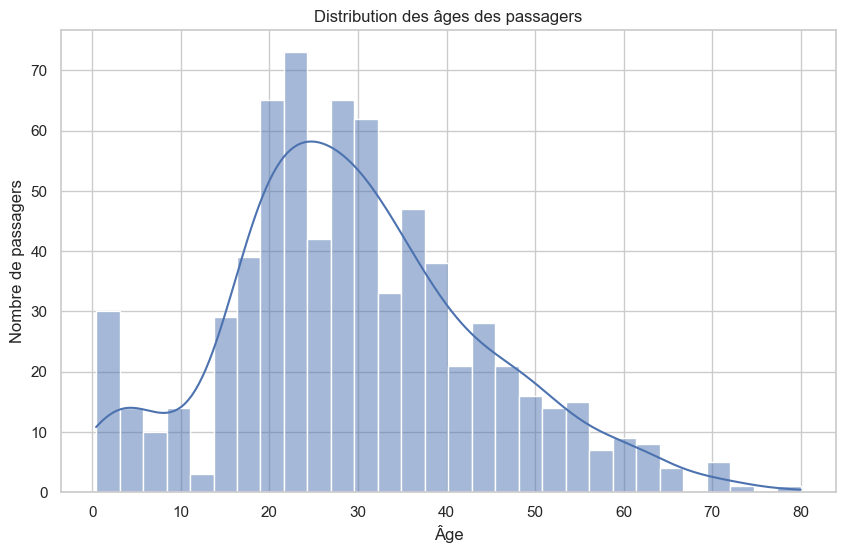

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Distribution des âges des passagers')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.show()

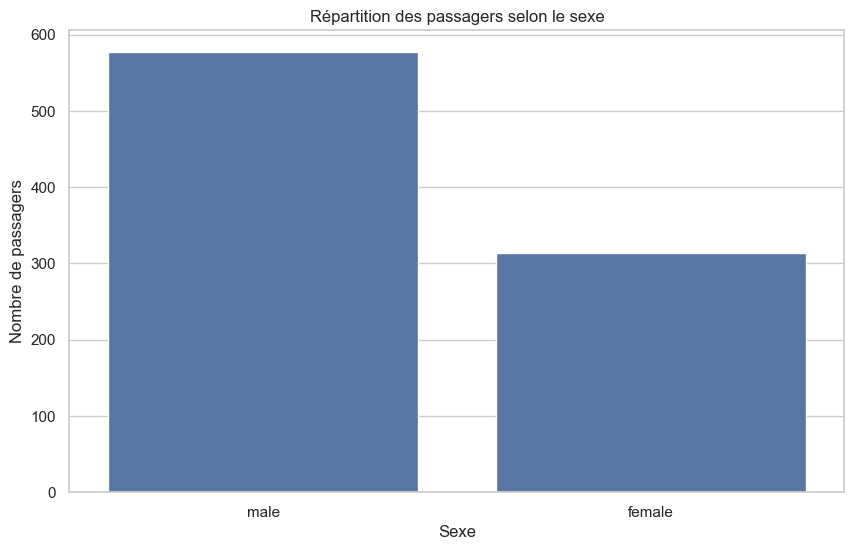

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Répartition des passagers selon le sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()

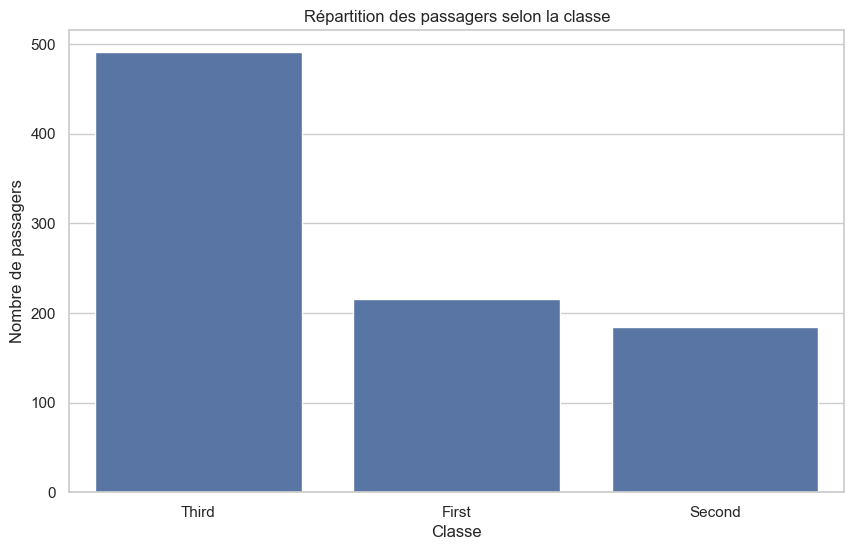

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Répartition des passagers selon la classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

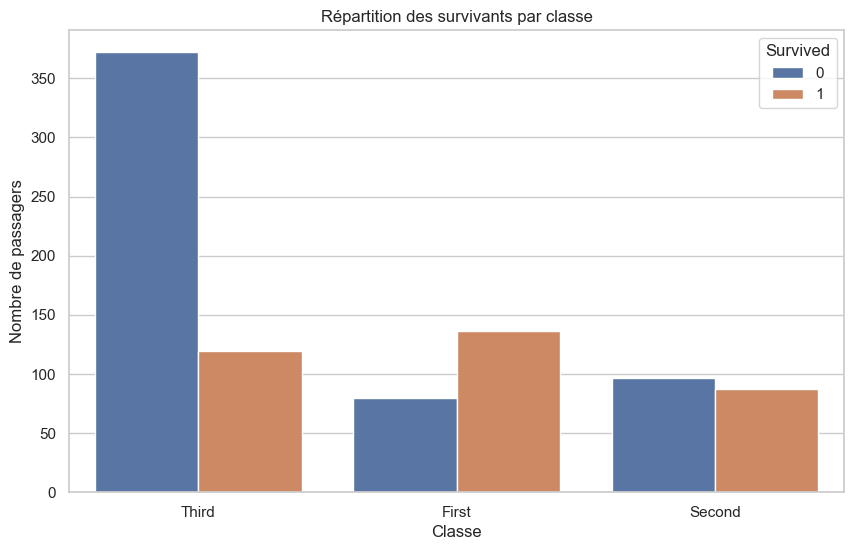

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='survived', data=df)
plt.title('Répartition des survivants par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survived')
plt.show()

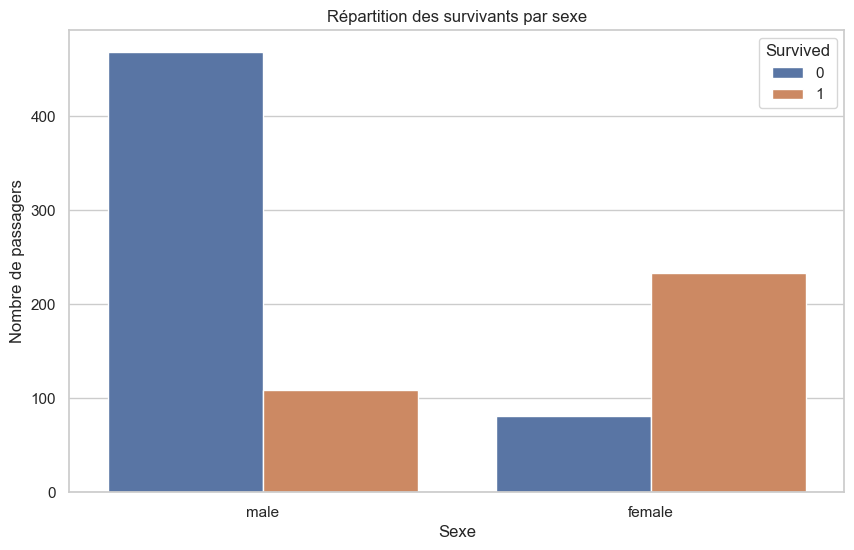

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Répartition des survivants par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survived')
plt.show()

# Correlation

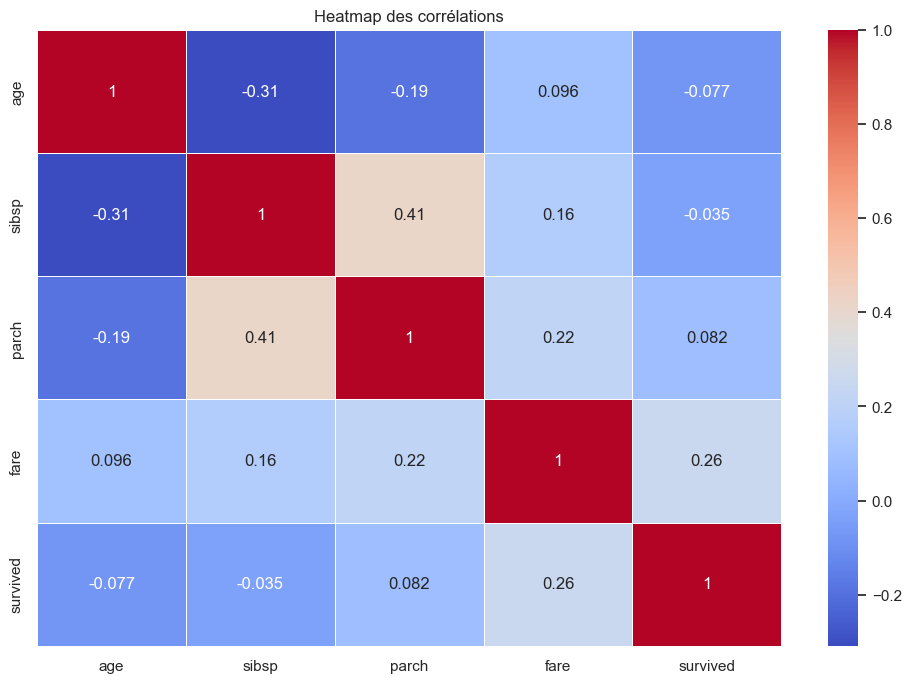

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()

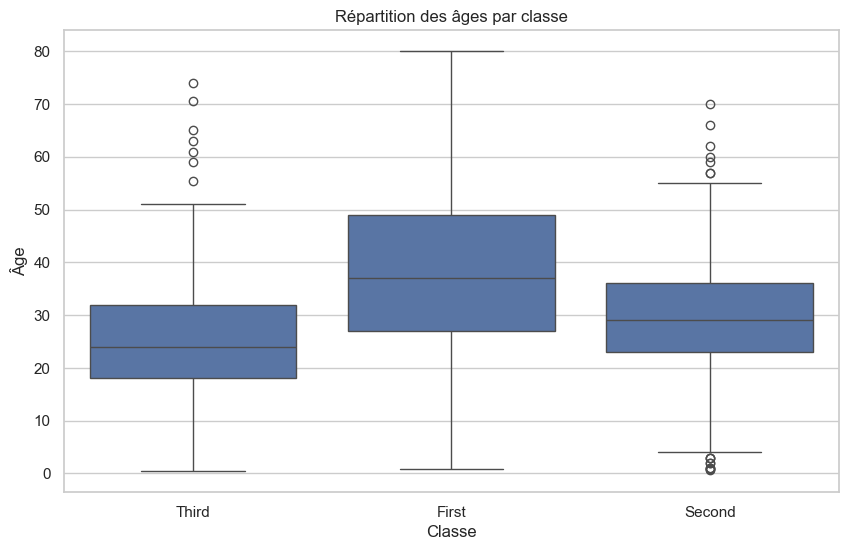

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Répartition des âges par classe')
plt.xlabel('Classe')
plt.ylabel('Âge')
plt.show()

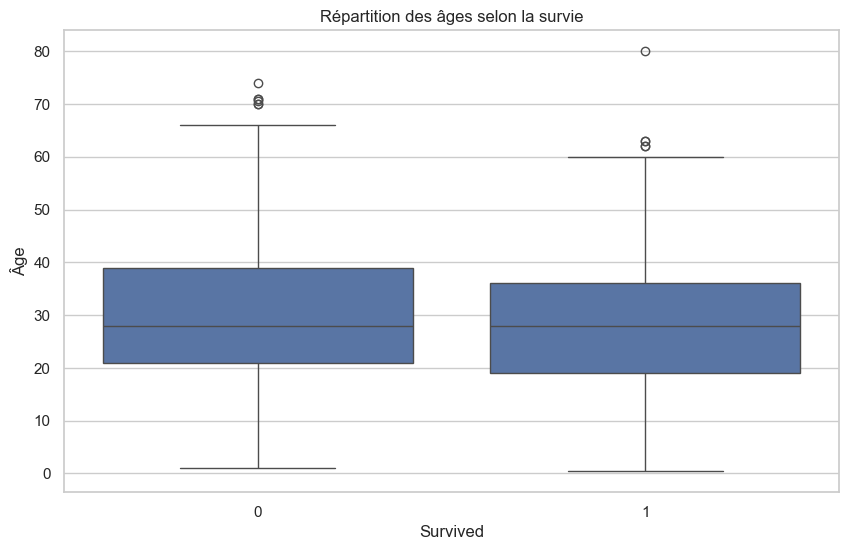

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Répartition des âges selon la survie')
plt.xlabel('Survived')
plt.ylabel('Âge')
plt.show()

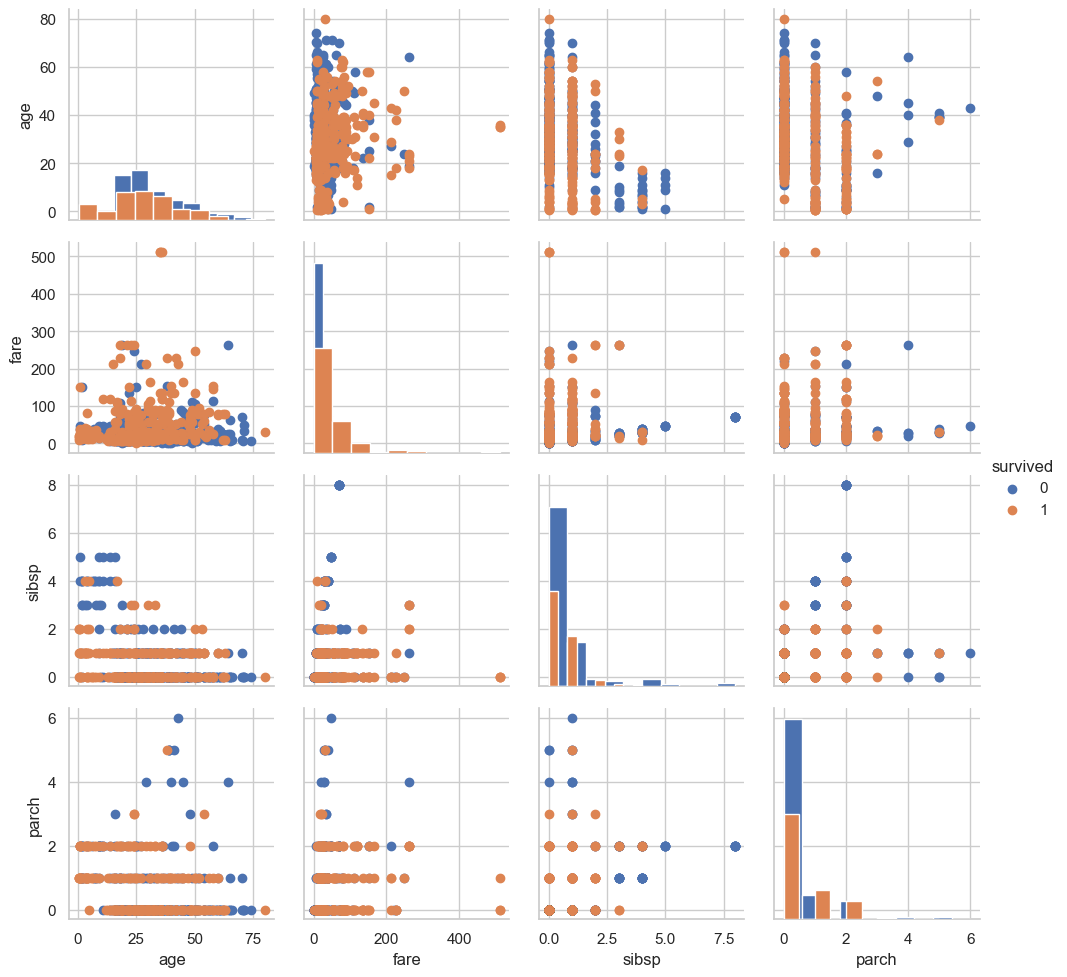

In [25]:
g = sns.PairGrid(df, hue="survived", vars=['age', 'fare', 'sibsp', 'parch'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    int64  
 1   age       891 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  891 non-null    int64  
 6   class     891 non-null    int64  
 7   who       891 non-null    int64  
 8   alone     891 non-null    int64  
 9   survived  891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB
None


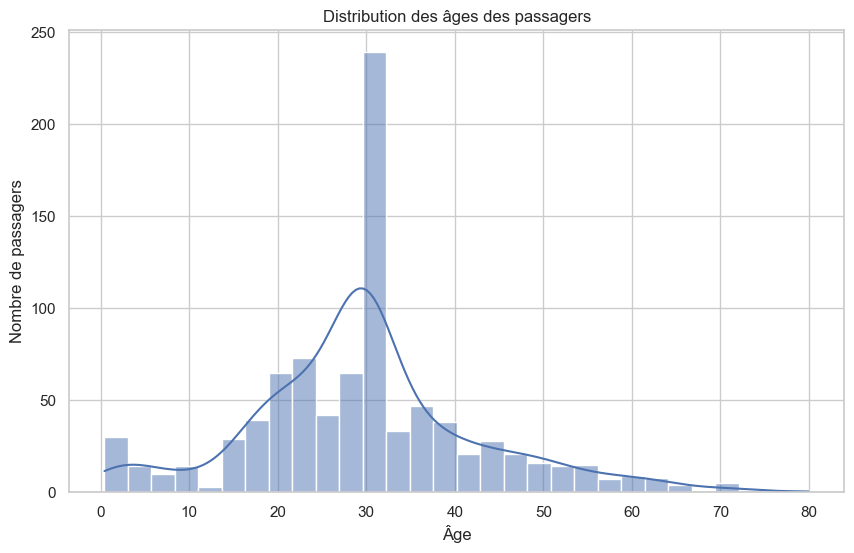

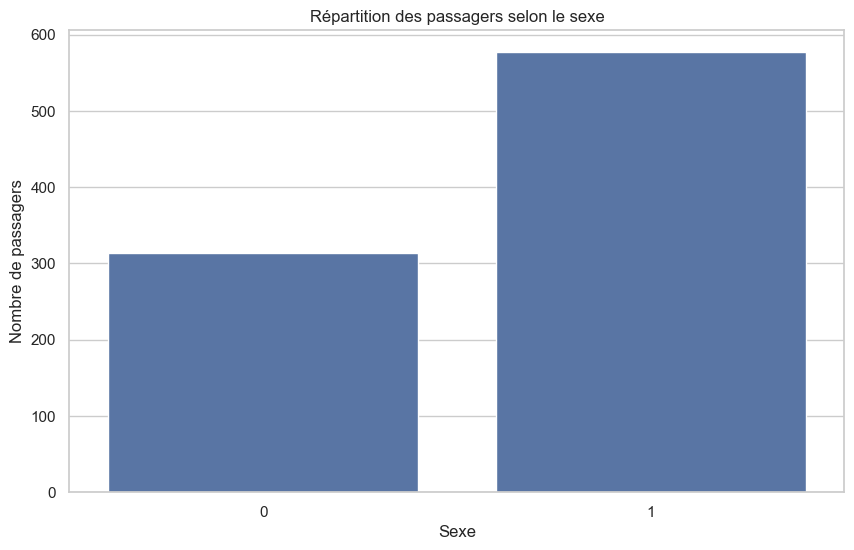

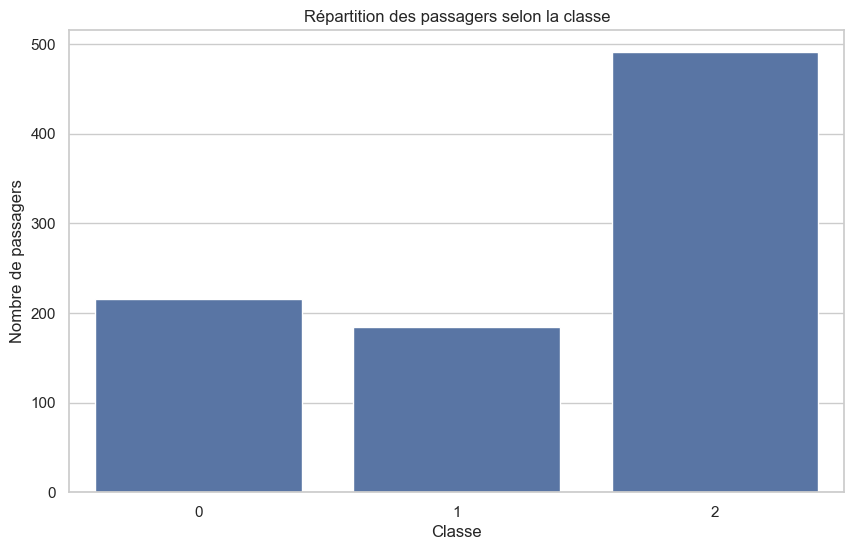

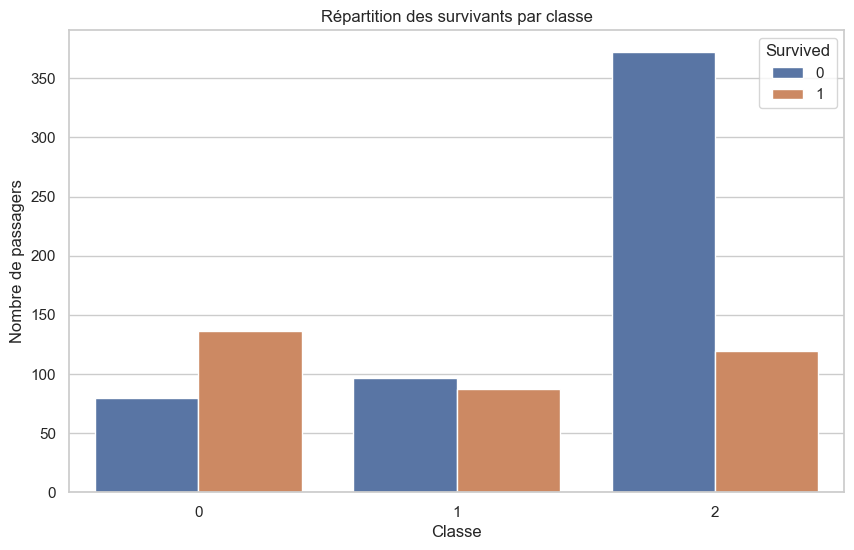

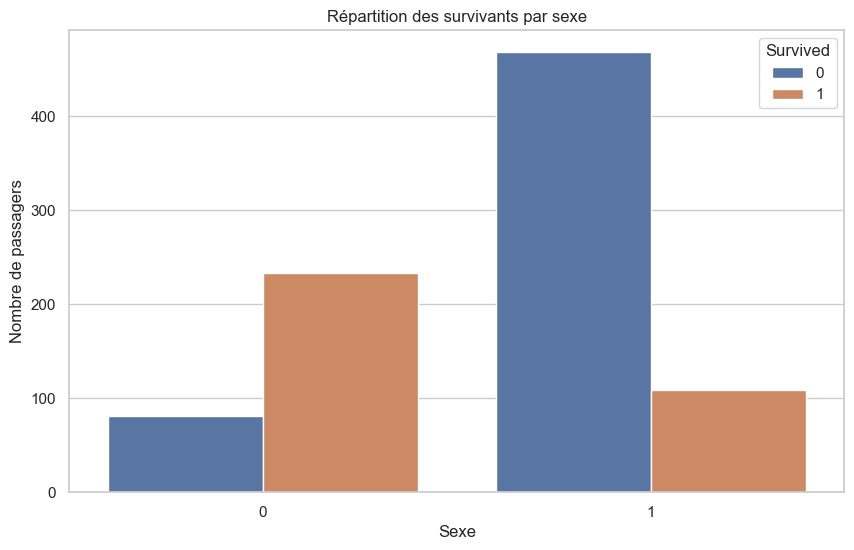

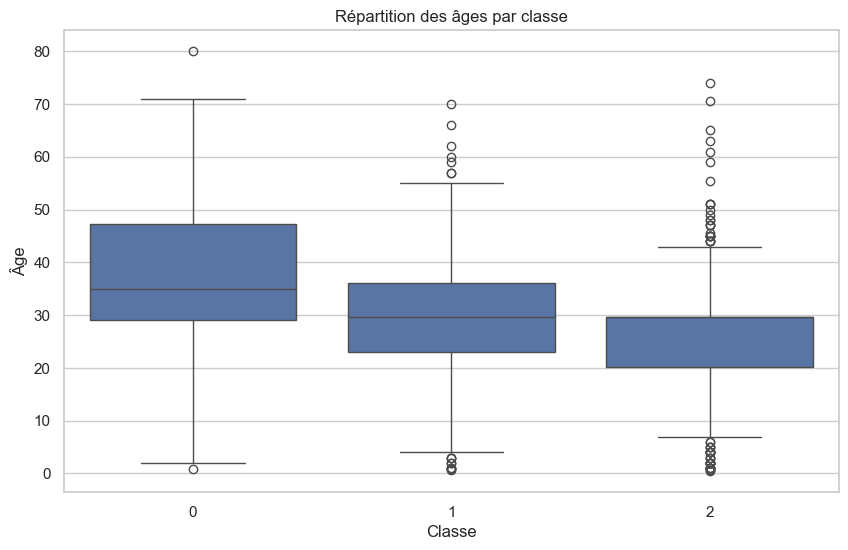

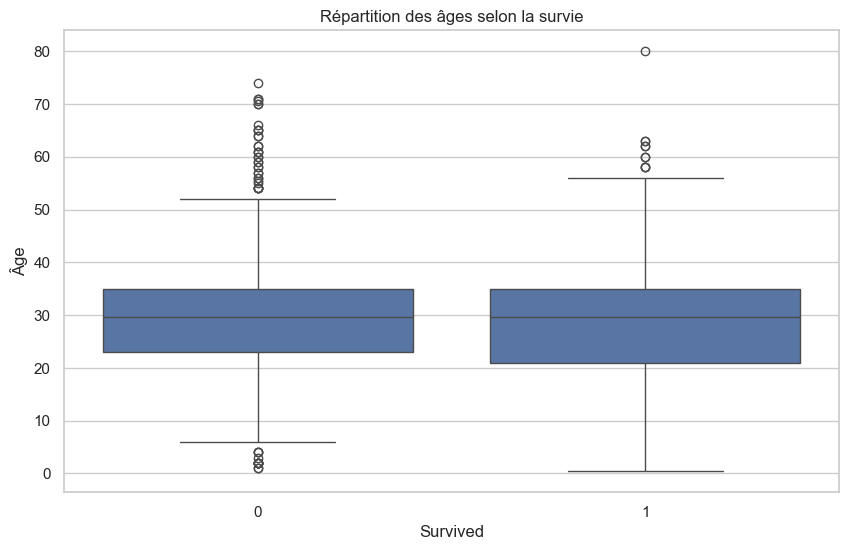

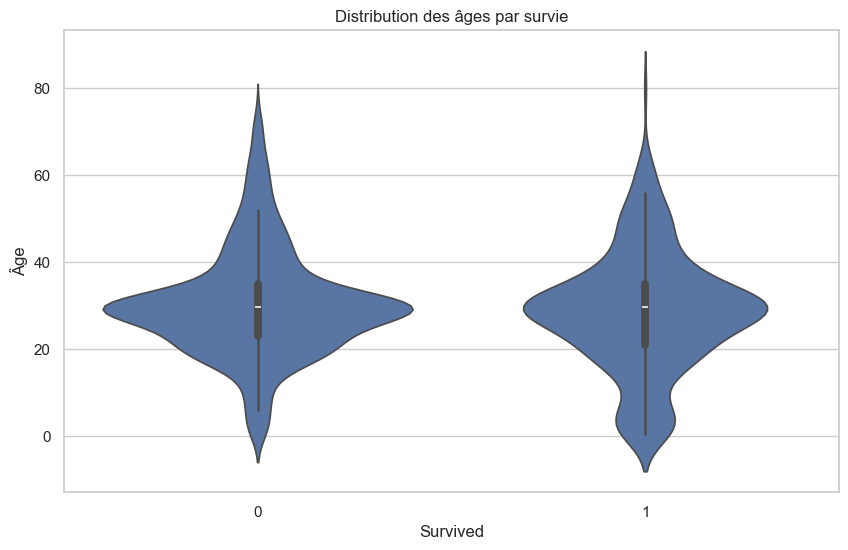

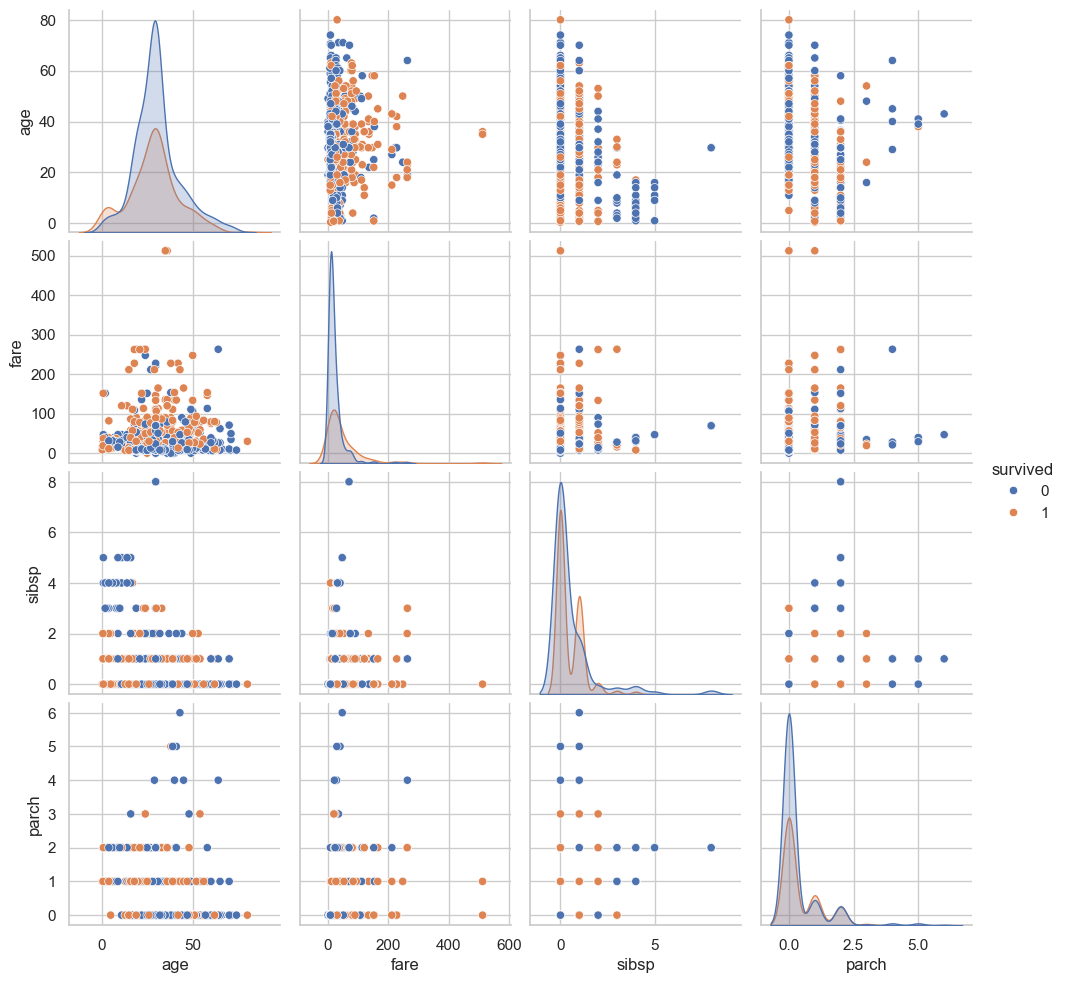

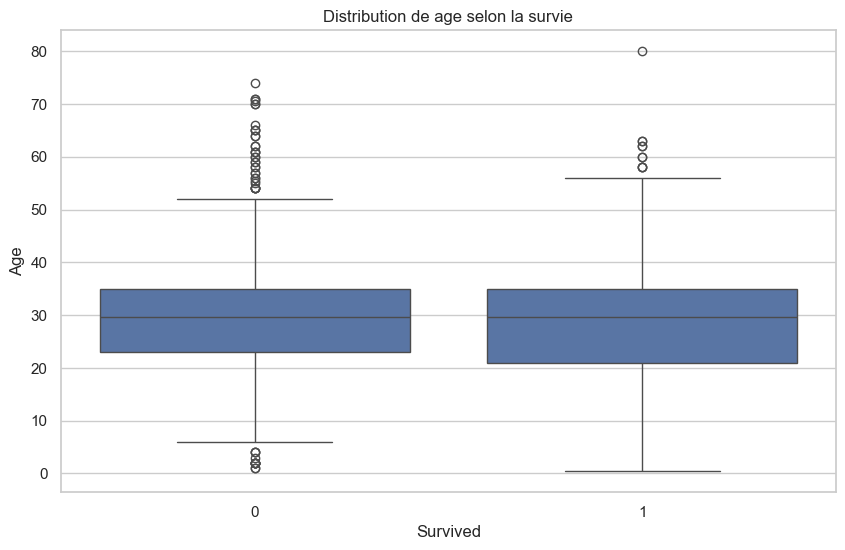

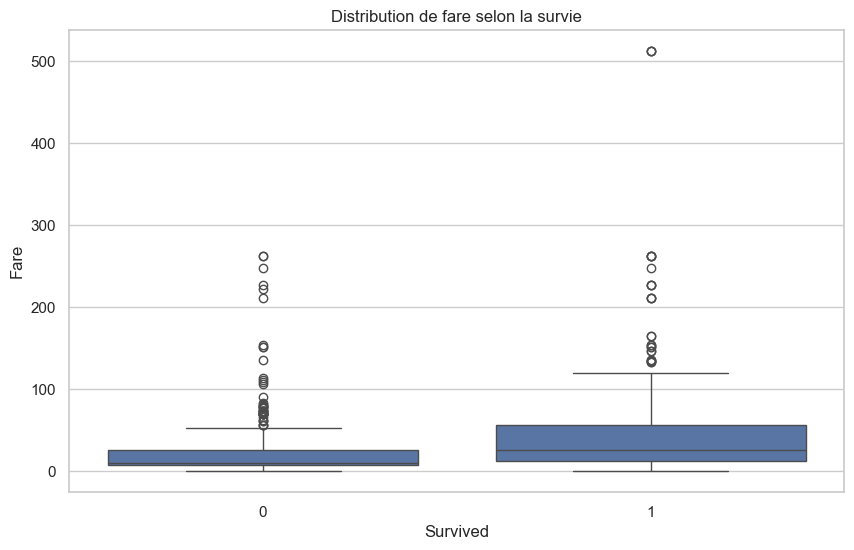

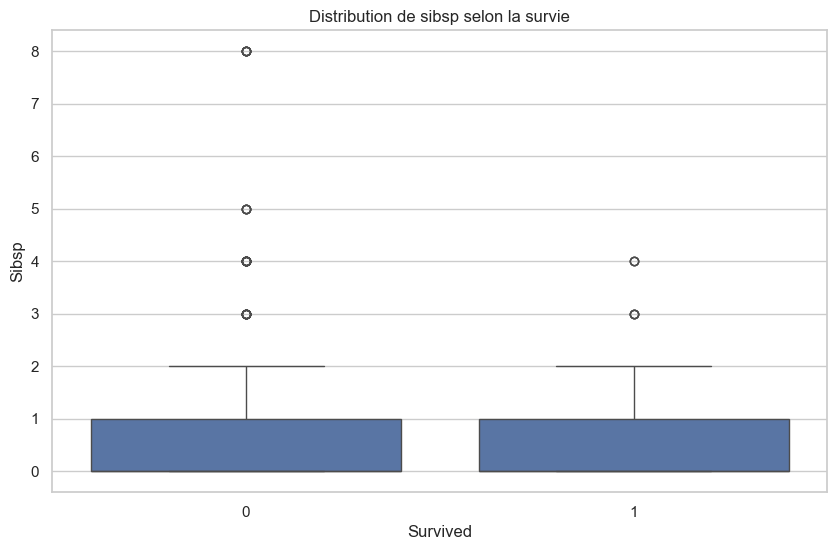

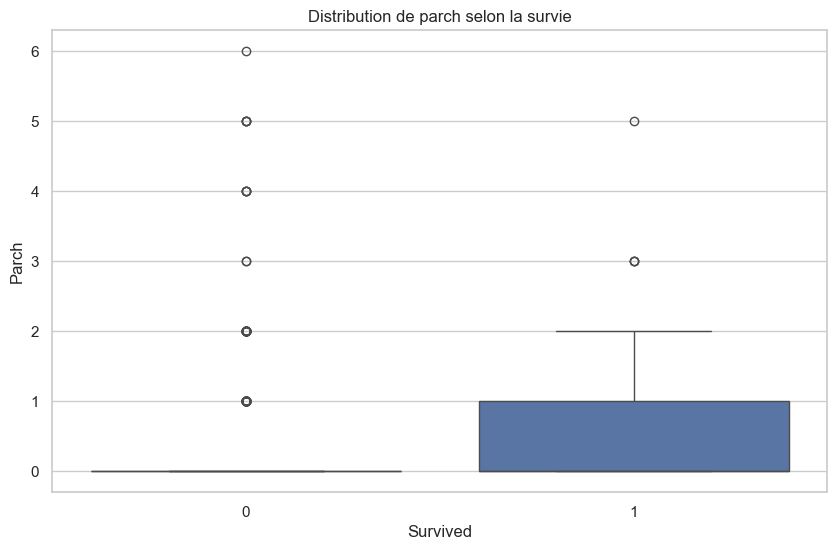

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Charger les données
df = pd.read_csv('../data/Titanic.csv')

# Afficher les noms des colonnes
print(df.columns)

# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Remplir les valeurs manquantes
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Encoder les variables catégorielles
label_encoders = {}
categorical_columns = ['sex', 'embarked', 'class', 'who', 'alone']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Afficher des informations générales sur le dataset
print(df.info())

# Histogramme de l'âge des passagers
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution des âges des passagers')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.show()

# Répartition des passagers selon le sexe
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Répartition des passagers selon le sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()

# Répartition des passagers selon la classe
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Répartition des passagers selon la classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

# Répartition des survivants par classe
plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='survived', data=df)
plt.title('Répartition des survivants par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survived')
plt.show()

# Répartition des survivants par sexe
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Répartition des survivants par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survived')
plt.show()

# Boxplot pour visualiser la relation entre l'âge et la classe
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Répartition des âges par classe')
plt.xlabel('Classe')
plt.ylabel('Âge')
plt.show()

# Boxplot pour visualiser la relation entre l'âge et la survie
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Répartition des âges selon la survie')
plt.xlabel('Survived')
plt.ylabel('Âge')
plt.show()

# Diagramme en violon pour visualiser la distribution des âges par survie
plt.figure(figsize=(10, 6))
sns.violinplot(x='survived', y='age', data=df)
plt.title('Distribution des âges par survie')
plt.xlabel('Survived')
plt.ylabel('Âge')
plt.show()

# Pairplot pour visualiser les relations entre les variables
sns.pairplot(df, hue='survived', vars=['age', 'fare', 'sibsp', 'parch'])
plt.show()

# Boxplot pour visualiser les distributions des variables numériques selon la survie
numeric_columns = ['age', 'fare', 'sibsp', 'parch']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='survived', y=col, data=df)
    plt.title(f'Distribution de {col} selon la survie')
    plt.xlabel('Survived')
    plt.ylabel(col.capitalize())
    plt.show()


